In [1]:
import os
import sys
import numpy as np

# Navigate to the parent directory of the project structure
project_dir = os.path.abspath(os.path.join(os.getcwd(), '../..'))
src_dir = os.path.join(project_dir, 'src')
log_dir = os.path.join(project_dir, 'log')
fig_dir = os.path.join(project_dir, 'fig')

# Add the src directory to sys.path
sys.path.append(src_dir)


from Dataset.cancer_dataset_for_LS import main_generate_cancer_matrices_for_LS, load_cancer_dataset_matrices_for_LS
from analysis.commons import data_normalize_by_features, concatenate_B_b

from estimator.NDIS import BasicNDISEstimator
from analysis.RP_privacy_analysis_advanced import _compute_gamma_delta

In [2]:
file_X_path = os.path.join(project_dir, "Dataset", "cancer-LR-X.txt")
file_y_path = os.path.join(project_dir, "Dataset", "cancer-LR-y.txt")

X = None
y = None
try:
    X, y = load_cancer_dataset_matrices_for_LS(file_X_name=file_X_path, file_y_name=file_y_path)
except:
    main_generate_cancer_matrices_for_LS(file_X_name=file_X_path, file_y_name=file_y_path)
    X, y = load_cancer_dataset_matrices_for_LS()

B, b = data_normalize_by_features(X, y)
A = concatenate_B_b(B, b)

In [3]:
from analysis.RP_privacy_analysis_advanced import gaussian_projection_ndis_delta
r = 10
epsilon = 1
index = 186

gaussian_projection_ndis_delta(B, index, r, epsilon)

0.4050518596683474

In [4]:
def t0(rho, eps, r):
    return 2 * (eps + r/2.0*np.log(rho)) / (rho-1)

In [5]:
M = B.T@B
M_inv = np.linalg.inv(M)
v = B[index].copy().reshape(-1, 1)

pi = (v.T @ M_inv @ v).item()
rho = 1 / (1 - pi)

_compute_gamma_delta(r/2, t0(rho, epsilon, r), rho, epsilon)

0.4050518596683474

Figure saved to: /home/wei402/Desktop/NDIS/fig/gamma_delta_vs_rho_eps3_r300.png


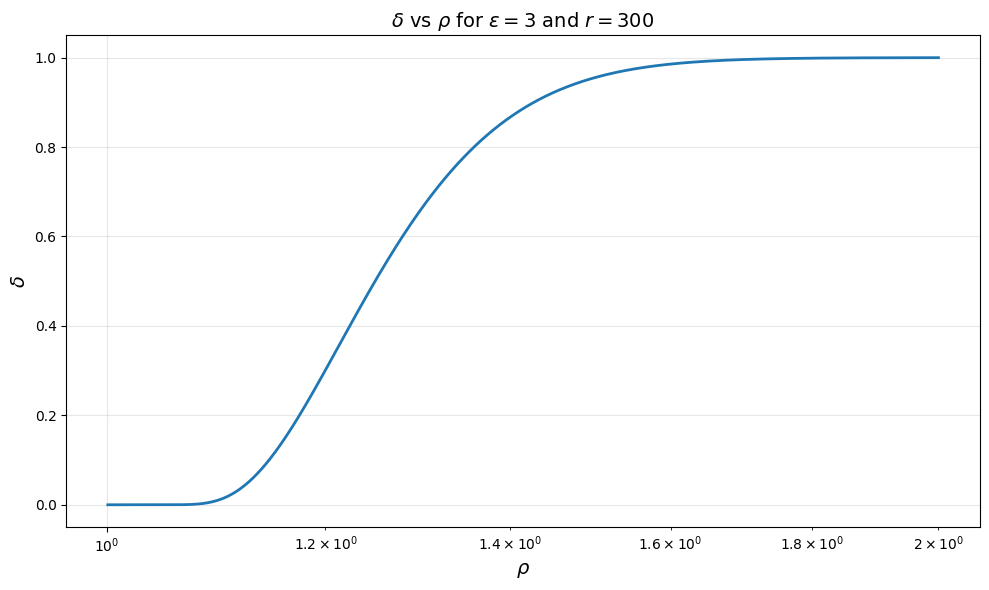


Parameters: ε = 3, r = 300
Range: ρ from 1.001 to 2.0
Number of points: 1000
Min δ: 0.000000
Max δ: 0.999917
δ at ρ=1.001: 0.000000
δ at ρ=100: 0.999917


In [6]:
import matplotlib.pyplot as plt

# Parameters
epsilon = 3
r = 300

# Range of rho values (avoiding rho=1 exactly to prevent division by zero)
rho_min = 1.001  # Start slightly above 1
rho_max = 2
num_points = 1000
rho_values = np.linspace(rho_min, rho_max, num_points)

# Compute delta for each rho
delta_values = []
for rho in rho_values:
    if np.isclose(rho, 1.0):
        delta_values.append(0.0)
    else:
        t0_val = t0(rho, epsilon, r)
        s = r / 2.0
        delta = _compute_gamma_delta(s, t0_val, rho, epsilon)
        delta_values.append(delta)

delta_values = np.array(delta_values)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(rho_values, delta_values, linewidth=2)
plt.xlabel(r'$\rho$', fontsize=14)
plt.ylabel(r'$\delta$', fontsize=14)
plt.title(r'$\delta$ vs $\rho$ for $\epsilon={}$ and $r={}$'.format(epsilon, r), fontsize=14)
plt.grid(True, alpha=0.3)
plt.xscale('log')  # Use log scale for rho since it ranges from 1 to 100
plt.tight_layout()

# Save the figure to fig_dir
os.makedirs(fig_dir, exist_ok=True)
filename = f'gamma_delta_vs_rho_eps{epsilon}_r{r}.png'
filepath = os.path.join(fig_dir, filename)
plt.savefig(filepath, dpi=300, bbox_inches='tight')
print(f"Figure saved to: {filepath}")

plt.show()

# Print some statistics
print(f"\nParameters: ε = {epsilon}, r = {r}")
print(f"Range: ρ from {rho_min:.3f} to {rho_max:.1f}")
print(f"Number of points: {num_points}")
print(f"Min δ: {np.nanmin(delta_values):.6f}")
print(f"Max δ: {np.nanmax(delta_values):.6f}")
print(f"δ at ρ=1.001: {delta_values[0]:.6f}")
print(f"δ at ρ=100: {delta_values[-1]:.6f}")

